### List of all Possible Dimensionality Techniques and when to use them

#### Dimensionality reduction techniques can be classified into two 3 types

#### Feature selection:
a) Missing Value Ratio: If the dataset has too many missing values, we use this approach to reduce the number of variables. We can drop the variables having a large number of missing values in them.

b) Low Variance filter: We apply this approach to identify and drop constant variables from the dataset. The target variable is not unduly affected by variables with low variance, and hence these variables can be safely dropped.

c) High Correlation filter: A pair of variables having high correlation increases multicollinearity in the dataset. So, we can use this technique to find highly correlated features and drop them accordingly.

d) Random Forest: This is one of the most commonly used techniques which tells us the importance of each feature present in the dataset. We can find the importance of each feature and keep the top most features, resulting in dimensionality reduction.

e) Both Backward Feature Elimination and Forward Feature Selection techniques take a lot of computational time and are thus generally used on smaller datasets.

#### Components / Factor Based:
a) Factor Analysis: This technique is best suited for situations where we have highly correlated set of variables. It divides the variables based on their correlation into different groups, and represents each group with a factor.

b) Principal Component Analysis: This is one of the most widely used techniques for dealing with linear data. It divides the data into a set of components which try to explain as much variance as possible.

c) Independent Component Analysis: We can use ICA to transform the data into independent components which describe the data using less number of components.

#### Projection Based:
a) ISOMAP: We use this technique when the data is strongly non-linear.

b) t-SNE: This technique also works well when the data is strongly non-linear. It works extremely well for visualizations as well.

c) UMAP: This technique works well for high dimensional data. Its run-time is shorter as compared to t-SNE.

### Application: Exploring Handwritten Digits

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

##### The images data is a three-dimensional array: 1,797 samples, each consisting of an 8×8 grid of pixels.

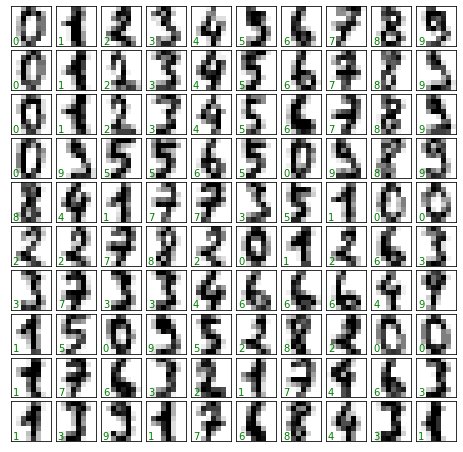

In [3]:
# visualize the first hundred of these
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
subplot_kw={'xticks':[], 'yticks':[]},
gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i,ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
    transform=ax.transAxes, color='green')

In [4]:
#two-dimensional,[n_samples, n_features] representation
X = digits.data
X.shape

(1797, 64)

In [5]:
y = digits.target
y.shape

(1797,)

##### 1,797 samples and 64 features.

In [6]:
#transform the data to two dimensions using manifold learning algorithm called Isomap
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

##### The projected data is now two-dimensional

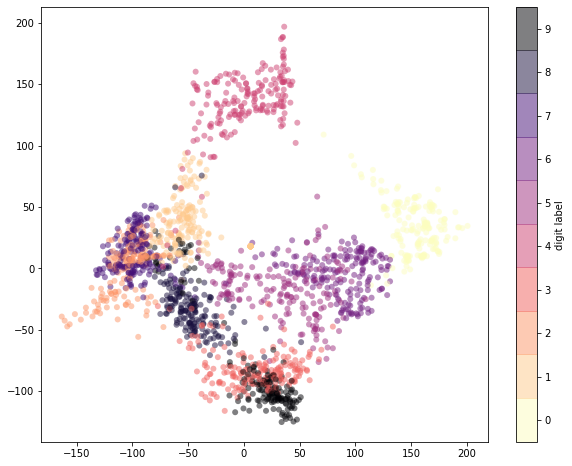

In [7]:
# plot this data to see if we can learn anything from its structure 
plt.figure(figsize=(10, 8))
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('magma_r', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

In [8]:
from sklearn.model_selection import train_test_split
 # Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=15)

In [9]:
#fit a Gaussian naive Bayes model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [10]:
# gauge its accuracy by comparing the true values of the test set to the predictions
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8407407407407408

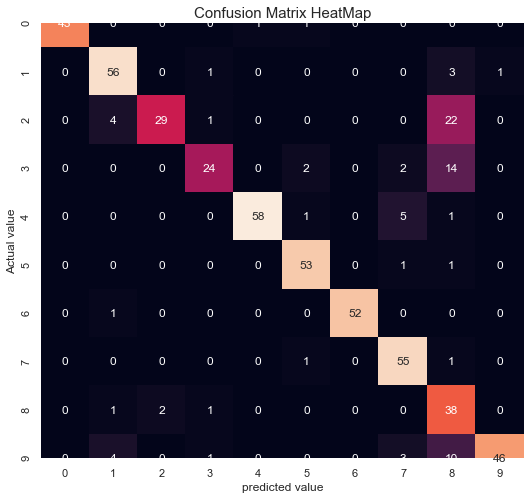

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline 
sns.set(color_codes=True)
#visualization of confusion matrix in the form of a heatmap
plt.figure(figsize = (12, 8))
mat = confusion_matrix(y_test, pred)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('Actual value');
plt.title('Confusion Matrix HeatMap', fontsize = 15);

##### This shows us where the mislabeled points tend to be: for example, a large number of twos here are misclassified as either ones or eights

##### Another way to gain intuition into the characteristics of the model is to plot the inputs again, with their predicted labels. We’ll use green for correct labels, and red for incorrect labels

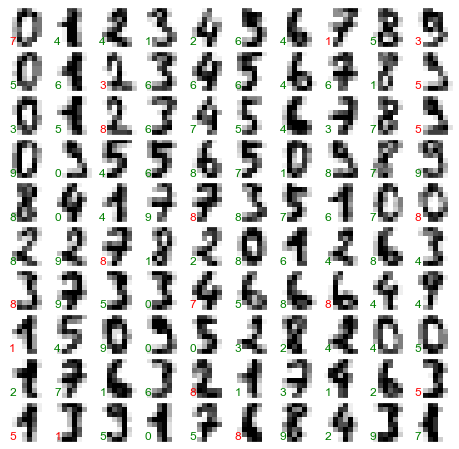

In [12]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
 subplot_kw={'xticks':[], 'yticks':[]},
 gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(pred[i]),
    transform=ax.transAxes,
    color='green' if (y_test[i] == pred[i]) else 'red')